# 如何處理 Google Forms 的原始問卷數據
這個 Jupyter Notebook 示範如何處理 Google Forms 的原始問卷數據 (`/result_hashed.csv`)。這裡使用 `graph-tool` 這個 Python 函式庫（而非 `networkx`）來處理網絡數據。

In [2]:
import pandas as pd
import numpy as np
import graph_tool.all as gt

In [3]:
a = pd.read_csv("result_hashed.csv")

以下這段 script 分成兩個部分。

第一部分由前兩個 for 迴圈組成，其目的是要蒐集數據裡所有的節點，並且經過 np.random 給 shuffle 過，使得最後儲存的 `in-class_network.txt` 檔辨認不出每個人的姓名。（當然放在 GitHub 的 `result_hashed.csv` 檔案都已經經過加密）。

第二部分則由第三個 for 迴圈組成，其目的是要處理數據，並存成 `graph-tool` 的 Graph object.

In [4]:
d_ = []
edges = []
nodes = set()
g = gt.Graph()
g.set_directed(True)

for node_idx, i in enumerate(np.array(a)):
    for idx, item in enumerate(i):
        if idx == 1:  # ID
            nodes.add(item)
        elif idx == 3:  # ID
            d = []
            for nb in str(item).split(';'):
                if nb in [' ', 'nan']:
                    d += [' ']
                else:
                    nodes.add(nb)

m = list(nodes)
np.random.shuffle(m)
mapping = dict()
g.add_vertex(len(m))
for idx, name in enumerate(m):
    mapping[name] = idx
    try:
        g.vp["name"][idx] = name
        
    except:
        g.vp["name"] = g.new_vertex_property("string")
        g.vp["name"][idx] = name
        g.vp["dept_color"] = g.new_vertex_property("string")
        g.vp["sex_color"] = g.new_vertex_property("string")
        g.vp["sex"] = g.new_vertex_property("string")
        g.vp["age"] = g.new_vertex_property("int")
        g.vp["department"] = g.new_vertex_property("string")
        g.vp["time-to-bed"] = g.new_vertex_property("string")
    g.vp["dept_color"][idx] = '#DDDDDD'
    g.vp["sex_color"][idx] = '#DDDDDD'
        
for i in np.array(a):
    for idx, item in enumerate(i):
        if idx == 1:  # ID
            data = []
            source_id = mapping[item]
            data += [source_id]
            
        elif idx == 3:  # IDs-of-acquaintances
            d = []
            for nb in str(item).split(';'):
                if nb in [' ', 'nan']:
                    d += [' ']
                else:
                    edges += [(source_id, mapping[nb])]
                    d += [mapping[nb]]                    
                    g.add_edge(source_id, mapping[nb])
            data += [d]
        elif idx == 4:  # sex
            if item == "男生":
                data += [['m']]
                sex_color = '#7FDBFF'
            elif item == "女生":
                data += [['f']]
                sex_color = '#FF4136'
            else:
                data += [['n/a']]
            # update vertex property
            g.vp["sex_color"][source_id] = sex_color
            g.vp["sex"][source_id] = data[-1][0]
        elif idx == 5:  # age
            data += [[item]]
            # update vertex property
            g.vp["age"][source_id] = data[-1][0]
        elif idx == 6:  # department
            if item in ["統計系", "統計", "統計學系", "統計所"]:
                data += [['stat']]
                dept_color = "#0074D9"
                
            elif item in ["工資管"]:
                data += [['iim']]
                dept_color = "#39CCCC"
                
            elif item in ["藥學系"]:
                data += [['pharmacy']]
                dept_color = "#01FF70"
                
            elif item in ["資源工程"]:
                data += [['mp']]
                dept_color = "#FFDC00"
                
            elif item in ["生物醫學工程系", "醫工系", "生物醫學工程學系"]:
                data += [['bme']]
                dept_color = "#B10DC9"
                
            elif item in ["土木系"]:
                data += [['civil']]
                dept_color = "#AAAAAA"
                
            elif item in ["機械系"]:
                data += [['me']]
                dept_color = "#FF851B"
                
            elif item in ["會計系"]:
                data += [['acc']]
                dept_color = "#FF4136"
                
            elif item in ["資訊工程學系"]:
                data += [['csie']]
                dept_color = "#3D9970"
                
            elif item in ["工設所"]:
                data += [['ide']]
                dept_color = "#85144b"
            elif item in ["物理系"]:
                data += [['x']]
                dept_color = "#AF853A"
            else:
                print(item)
            # update vertex property
            g.vp["dept_color"][source_id] = dept_color
            g.vp["department"][source_id] = data[-1][0]
                
        elif idx == 7:  # time-to-bed
            if item == "我是貓頭鷹：12 點之後 🦉":
                data += [['after-0']]
            elif item == "我是晨行鳥：12 點之前 🕊":
                data += [['before-0']]
            # update vertex property
            g.vp["time-to-bed"][source_id] = data[-1][0]
    d_ += [data]       

得到社交網路後，我們可以畫有向圖（以學生的系所區分著色）：

小秘訣：[這裡](http://clrs.cc/)可以找到許多漂亮的顏色以及其 Hex Color Code.

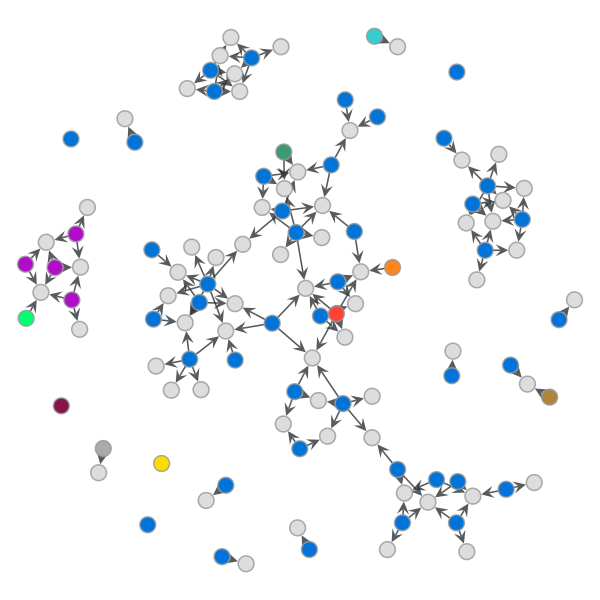

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12a048198, at 0x12a026198>

In [5]:
g.set_directed(True)
gt.graph_draw(g, vertex_fill_color=g.vp['dept_color'])

或是無向圖（以學生的系所區分著色）：

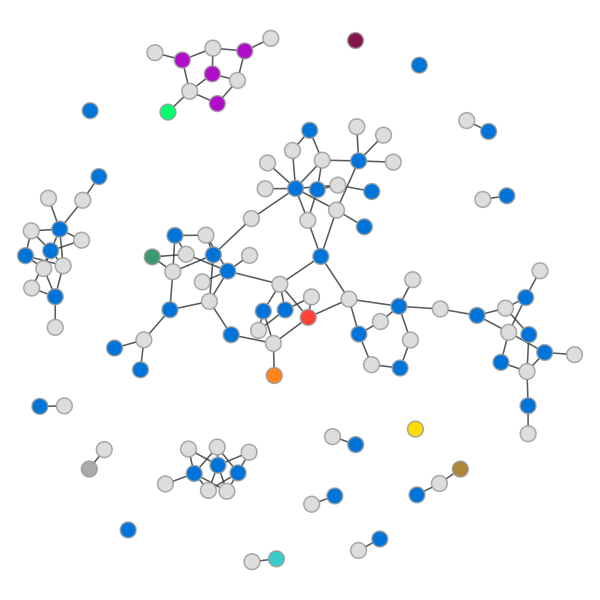

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12a048198, at 0x129ff4a58>

In [6]:
g.set_directed(False)
gt.graph_draw(g, vertex_fill_color=g.vp['dept_color'])

或是以性別為區分著色：

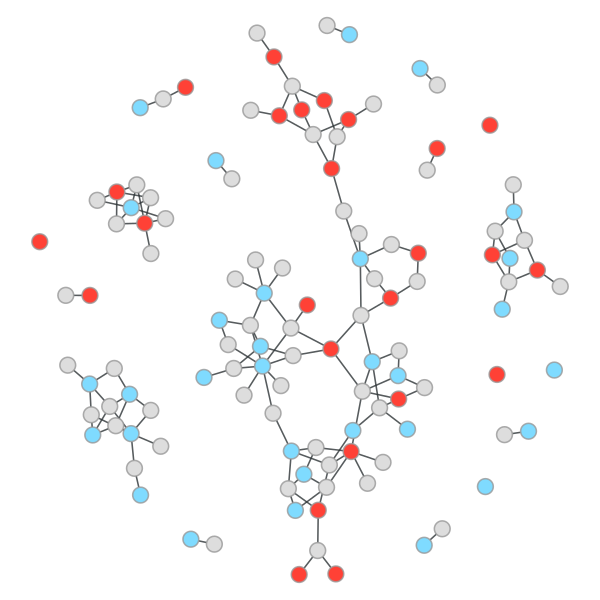

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12a048198, at 0x129ff4550>

In [7]:
g.set_directed(False)
gt.graph_draw(g, vertex_fill_color=g.vp['sex_color'])

這是用來存成 `In-class_network.txt` 檔案的 script:

In [4]:
d_ = sorted(d_, key=lambda x: x[0])
with open('in-class_network.txt', 'w') as f:
    f.write("ID" + "\t" + "IDs-of-acquaintances" + "\t" + "sex" + "\t" + "age" + "\t" + "department" + "\t" + "time-to-bed" + "\t" + "\n")
    for row in d_:
        f.write(str(row[0]) + "\t")
        for idx, nb in enumerate(row[1:][0]):
            if idx != len(row[1:][0]) - 1:
                f.write(str(nb) + ",")
            else:
                f.write(str(nb))
        f.write("\t")
        f.write(row[1:][1][0])  # sex
        f.write("\t")
        f.write(str(row[1:][2][0]))  # age
        f.write("\t")
        f.write(row[1:][3][0])  # department
        f.write("\t")
        f.write(row[1:][4][0])  # time-to-bed
        f.write("\n")

也可以將這個 graph object 經由 `graph-tool` 的 API 存成其他網絡數據格式，這裡是存成 GML.

In [17]:
g.save("in-class_net.gml")

就像 `networkx` 一樣，`graph-tool` 也允許使用者在 graph object 裡儲存其他的 attributes 數據。詳見其 API documentation.

In [9]:
g.list_properties()

age            (vertex)  (type: int32_t)
department     (vertex)  (type: string)
dept_color     (vertex)  (type: string)
name           (vertex)  (type: string)
sex            (vertex)  (type: string)
sex_color      (vertex)  (type: string)
time-to-bed    (vertex)  (type: string)
